<a href="https://colab.research.google.com/github/arthireddy14/Machine_Learning/blob/main/loan_approval_svm3types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

A fintech company provides instant personal loans through a mobile application.

To reduce risk, the company wants an AI-based decision system that predicts whether a loan should be Approved or Rejected.
Challenges:
Customer data is not linearly separable
Simple linear rules fail
Decision boundaries may be curved or complex
The solution must be interactive and deployable
You are hired as a Machine Learning Engineer to build and deploy this system.

Load the dataset and study applicant attributes such as:
Applicant income
Loan amount
Credit history
Employment status
Identify features that may influence loan approval.


In [ ]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
  df[col]=le.fit_transform(df[col])

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 62.5 KB


In [ ]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [ ]:
x=df.drop(columns=['Loan_ID','Loan_Status'])
y=df['Loan_Status']

Build three different SVM models using:
Linear kernel
Polynomial kernel
RBF kernel
Train each model and evaluate performance using:
Accuracy
Precision / Recall
Compare results and identify:
Which kernel handles non-linear patterns better
Which kernel generalizes best on unseen data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
svm_linear=SVC(kernel='linear',C=1)
svm_linear.fit(x_train,y_train)
y_pred_linear=svm_linear.predict(x_test)

Accuracy :  0.7886178861788617
Confusion matrix [TN FP][FN TP] [[18 25]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



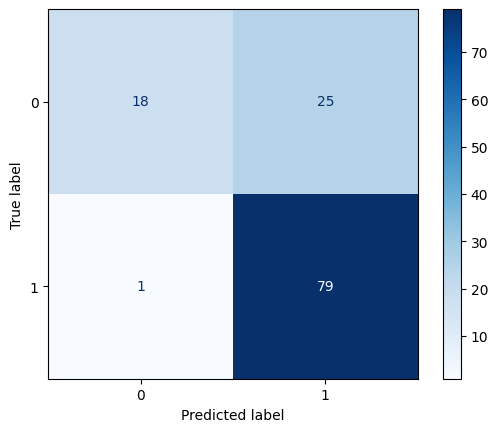

In [ ]:
print("Accuracy : ",accuracy_score(y_test,y_pred_linear))
cm=confusion_matrix(y_test,y_pred_linear)
print("Confusion matrix [TN FP][FN TP]",cm)
print(classification_report(y_test,y_pred_linear))
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [ ]:
svm_poly=SVC(kernel='poly',degree=3,C=1)
svm_poly.fit(x_train,y_train)
y_pred_poly=svm_poly.predict(x_test)

Accuracy :  0.7804878048780488
Confusion matrix [TN FP][FN TP] [[18 25]
 [ 2 78]]
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



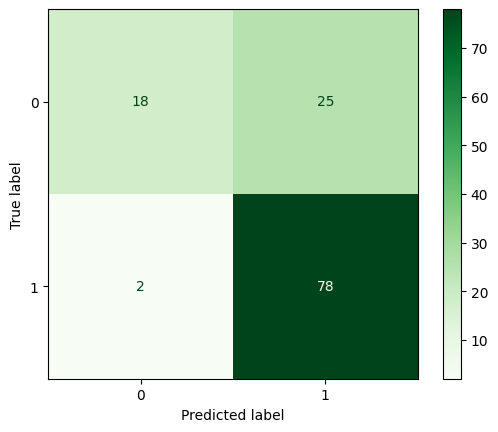

In [ ]:
print("Accuracy : ",accuracy_score(y_test,y_pred_poly))
cm=confusion_matrix(y_test,y_pred_poly)
print("Confusion matrix [TN FP][FN TP]",cm)
print(classification_report(y_test,y_pred_poly))
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')

In [ ]:
svm_rbf=SVC(kernel='rbf',C=1)
svm_rbf.fit(x_train,y_train)
y_pred_rbf=svm_rbf.predict(x_test)

Accuracy :  0.7967479674796748
Confusion matrix [TN FP][FN TP] [[18 25]
 [ 0 80]]
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



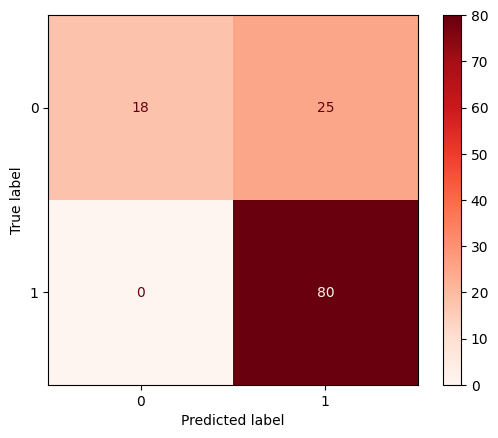

In [ ]:
print("Accuracy : ",accuracy_score(y_test,y_pred_rbf))
cm=confusion_matrix(y_test,y_pred_rbf)
print("Confusion matrix [TN FP][FN TP]",cm)
print(classification_report(y_test,y_pred_rbf))
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')

Analyze misclassifications:
How many eligible customers were rejected?
How many risky customers were approved?
Answer:
Is it worse to reject a genuine customer or approve a risky one?
Which metric matters most in this business scenario?

Eligible customers were rejected[FN]=0

Risky customers were approved[FP]=25

for SVM With RBF Kernel

Approving a risky customer is worse than rejecting a genuine customer.
